In [6]:
!pip install torch==2.3.1+cu121 torchvision==0.18.1+cu121 torchaudio==2.3.1+cu121 --index-url https://download.pytorch.org/whl/cu121
!pip install transformers==4.41.2
!pip install pillow
!pip install matplotlib
!pip install requests
!pip install numpy==1.26.4


Looking in indexes: https://download.pytorch.org/whl/cu121
  Using cached https://download.pytorch.org/whl/cu121/torch-2.3.1%2Bcu121-cp312-cp312-linux_x86_64.whl (780.9 MB)
  Using cached https://download.pytorch.org/whl/cu121/torchvision-0.18.1%2Bcu121-cp312-cp312-linux_x86_64.whl (7.0 MB)
  Using cached https://download.pytorch.org/whl/cu121/torchaudio-2.3.1%2Bcu121-cp312-cp312-linux_x86_64.whl (3.4 MB)
  Using cached https://download.pytorch.org/whl/cu121/nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached https://download.pytorch.org/whl/cu121/nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Attempting uninstall: nvidia-nccl-cu12
    Found existing installation: nvidia-nccl-cu12 2.21.5
    Uninstalling nvidia-nccl-cu12-2.21.5:
      Successfully uninstalled nvidia-nccl-cu12-2.21.5
  Attempting uninstall: nvidia-cudnn-cu12
    Found existing installation: nvidia-cudnn-cu12 9.1.0.70
    Uninstalling nvidia-cudnn-cu12-9.1.0.70:
   

In [1]:
from transformers import YolosImageProcessor, YolosForObjectDetection
import torch
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

In [2]:
import torch, transformers, numpy
print("Torch:", torch.__version__)
print("Transformers:", transformers.__version__)
print("NumPy:", numpy.__version__)


Torch: 2.3.1+cu121
Transformers: 4.41.2
NumPy: 1.26.4


In [3]:
model_name = "valentinafeve/yolos-fashionpedia"
processor = YolosImageProcessor.from_pretrained(model_name)
model = YolosForObjectDetection.from_pretrained(model_name)

image_path = "mulher.webp"  #nome do seu arquivo aqui
image = Image.open(image_path).convert("RGB")

inputs = processor(images=image, return_tensors="pt")
outputs = model(**inputs)

target_sizes = torch.tensor([image.size[::-1]])
results = processor.post_process_object_detection(outputs, target_sizes=target_sizes)[0]

draw = ImageDraw.Draw(image)
for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    if score > 0.7:  # confiança mínima
        box = [round(i, 2) for i in box.tolist()]
        label_name = model.config.id2label[label.item()]
        draw.rectangle(box, outline="red", width=2)
        draw.text((box[0], box[1]), f"{label_name} ({score:.2f})", fill="red")

# resultado
image.show()
image.save("resultado_yolos.png")


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.


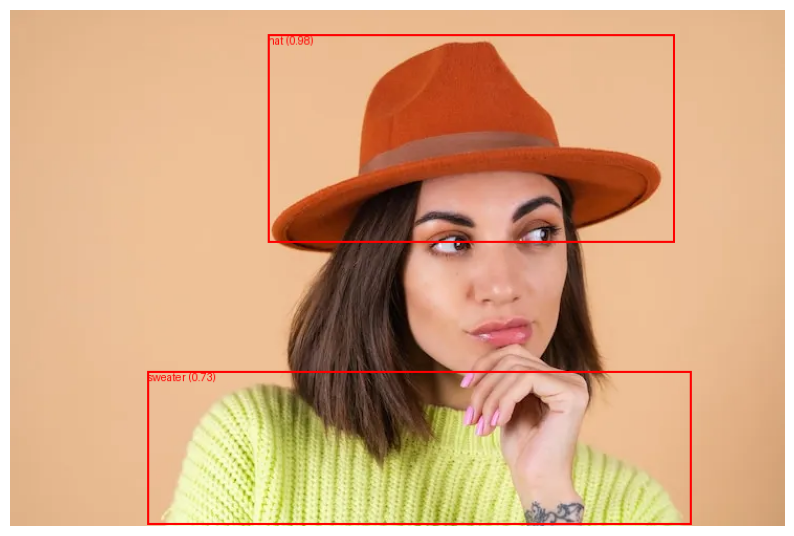

In [4]:
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis("off")
plt.show()